World Happiness ReportProject

Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


#### You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv


In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import ipywidgets

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

we have 158 rows and 12 columns of which my target is one, the "Happiness Score" 

In [6]:
# I want to move the target to the last column and have the features ordered aside

d_H_S = df.iloc[:, 3:4] 

df.drop(["Happiness Score"], axis=1, inplace=True )

df["Happiness Score"] = d_H_S

df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [ ]:
df[Happiness_Score]=df[{"Happiness Score":Happiness_Score}]

In [7]:
print("null values in each column: ",df.isnull().sum())
print("\n")
print("sum of the null values: ", df.isnull().sum().sum())


null values in each column:  Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64


sum of the null values:  0


The data presents 3 typer of datatype (float64(9), int64(1), object(2))), we will have to convert the object type to numerical values

In [8]:
# Separating Numerical and Categorical columns


Categorical_data = []
Numerical_data = []

for i in df.columns:
    if df.dtypes[i] == 'object':
        Categorical_data.append(i) # Checking for Categorical columns
    else:
        Numerical_data.append(i) #Checking for Numerical Columns


print("Categorical data: ", Categorical_data)
print("\n")
print("Numerical data: ", Numerical_data)


Categorical data:  ['Country', 'Region']


Numerical data:  ['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Happiness Score']


### Statiscal data of the numerical values

In [9]:
df.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


This give the statiscal information of the numerical columns. we can se no negative values present we can observe that:

The counts of all the columns are same which means the are no missing values in the dataset.

There is no much differences between the  mean values and the median at 50 percentile through all the columns; we can only observe that "Economy (GDP per Capita)" and "Family" presents mean slight less rispect to the value at 50%.

Therere is large difference between 75% and max only in the "Happiness Rank" 

The standard deviation is high only in the "Happiness Rank"

In summary, the data is quite perfect and the values are less distribuited. 

I will check anyways for outliers.

In [10]:
#Checkin the number of unique values in each column
df.nunique().to_frame("No. of unique values"), #to_frame is used to create a data frame for the selected code

(                               No. of unique values
 Country                                         158
 Region                                           10
 Happiness Rank                                  157
 Standard Error                                  153
 Economy (GDP per Capita)                        158
 Family                                          158
 Health (Life Expectancy)                        157
 Freedom                                         158
 Trust (Government Corruption)                   157
 Generosity                                      158
 Dystopia Residual                               158
 Happiness Score                                 157,)

<AxesSubplot:>

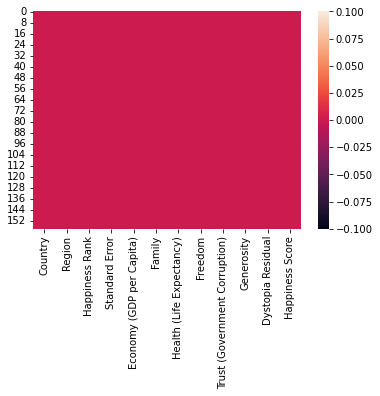

In [11]:
sns.heatmap(df.isnull())

no null values in the data as observed

<AxesSubplot:>

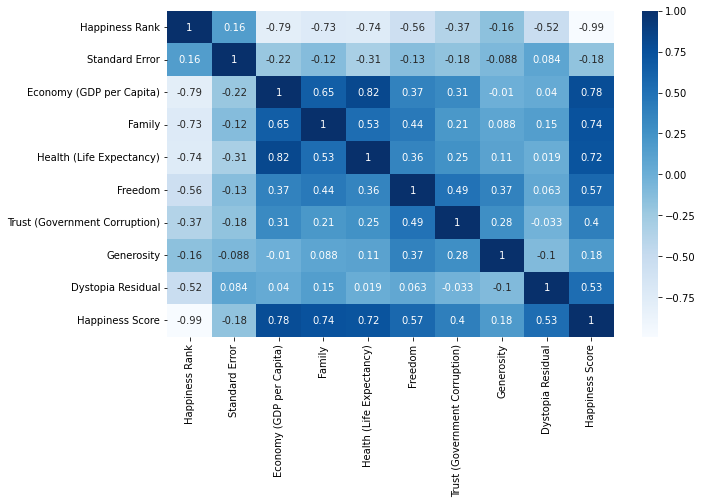

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap="Blues",annot=True)

Happiness Score is highly positive correlated with all the features, except with Trust which althougn positve but low rispect to the other features. 

In [13]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')>

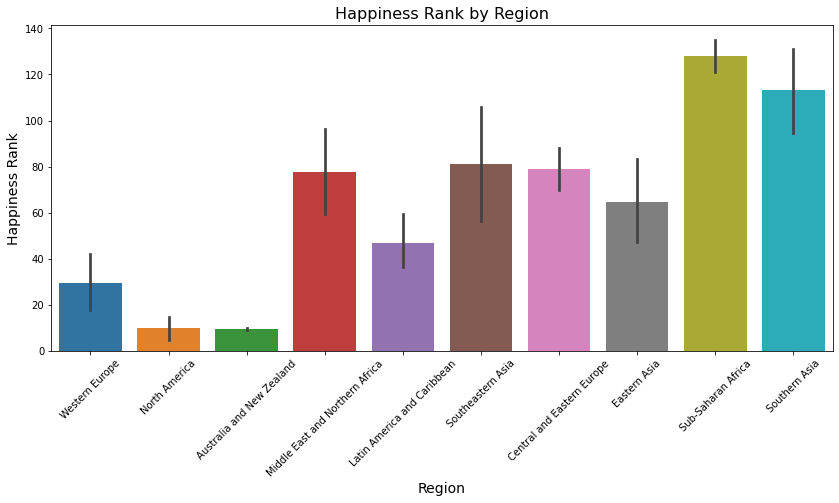

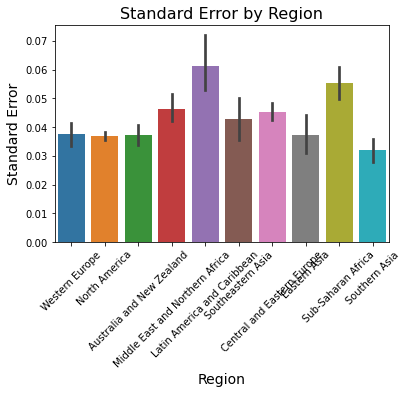

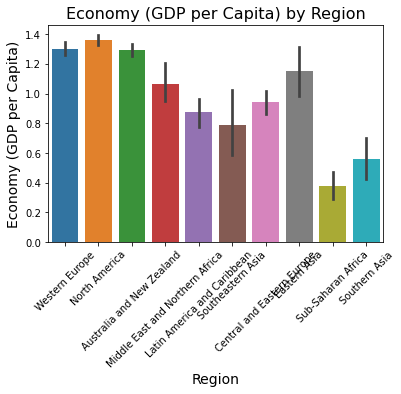

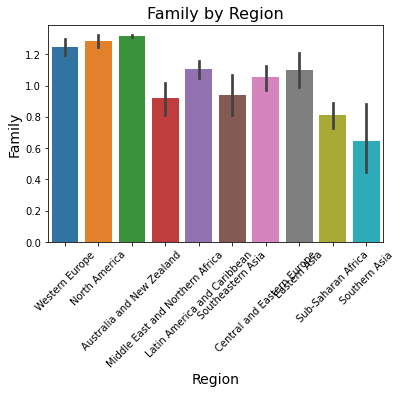

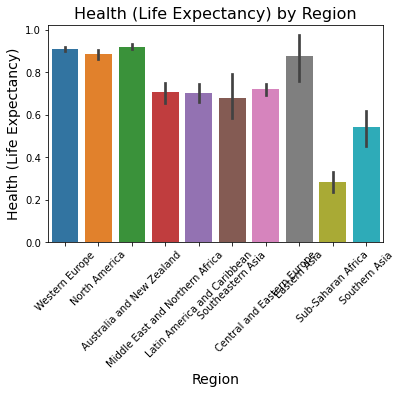

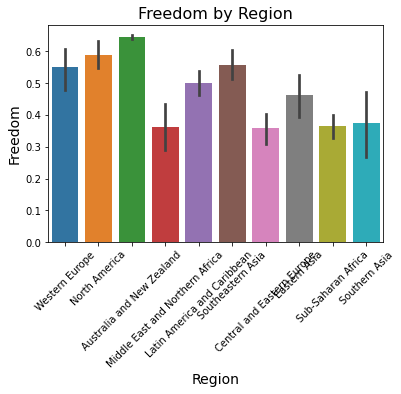

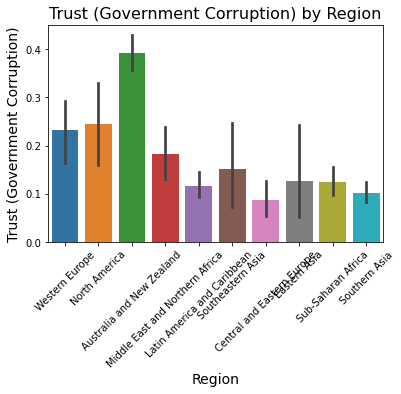

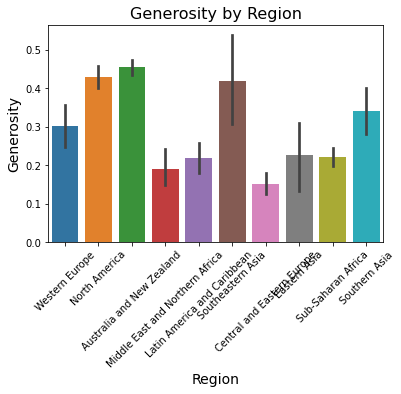

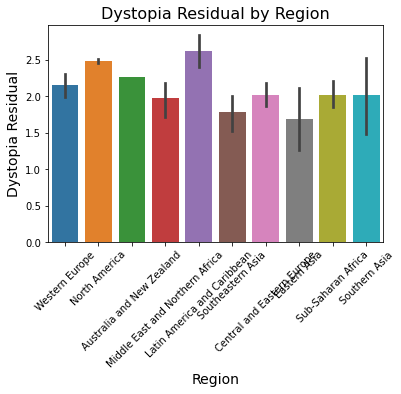

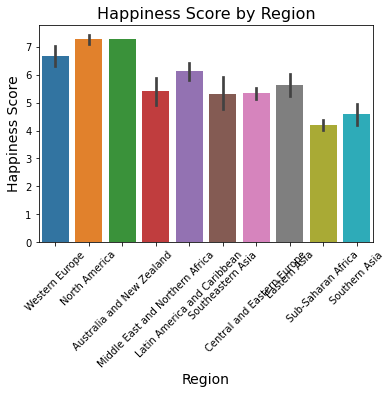

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

for col in Numerical_data:
    sns.barplot(data=df, x="Region", y=col)
    plt.title(f"{col} by Region", fontsize=16)
    plt.xlabel("Region", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(rotation=45) 
    plt.show()


We can notice that the Happiest regions by far are North America, Australia and New Zeeland and the standard deviation error is very hign in  Africa, this is because Western Europe, North America and New Zeelnd has a very good economy (developed areas) respect to SubSaharan Africa which has a very bad economy in contrast. The other features follow more or less the same trend 

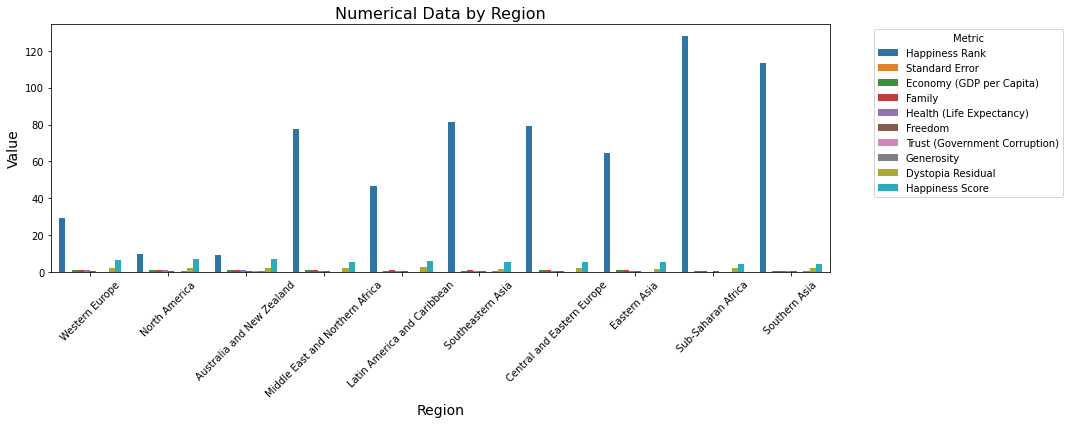

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 6))


df_melted = df.melt(id_vars=['Region'], value_vars=Numerical_data, var_name='Metric', value_name='Value')

sns.barplot(data=df_melted, x='Region', y='Value', hue='Metric', ci=None)
plt.title("Numerical Data by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)

plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Eastien Asia has the highest value in terms of the the Rank hence, it rappresent the saddest Region by far.

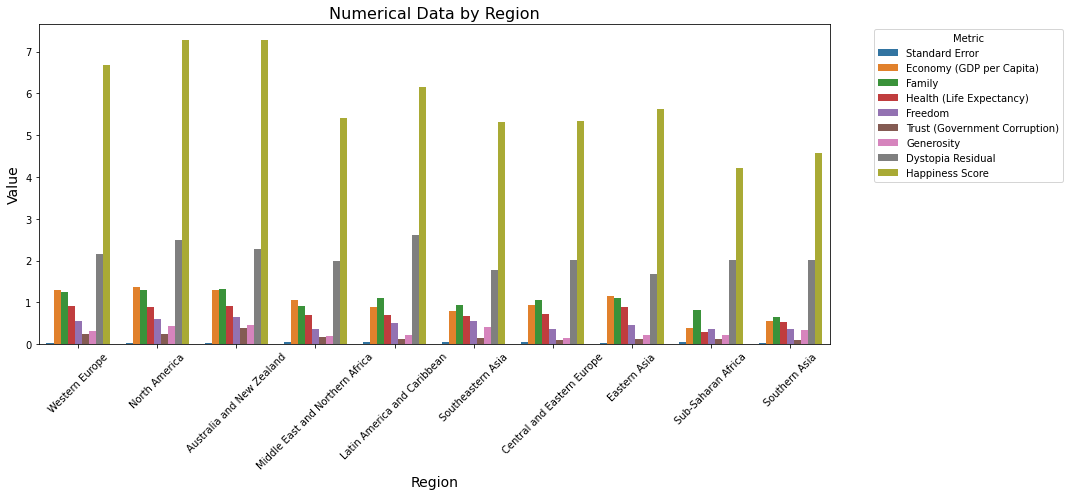

In [16]:
numerical_data = ['Standard Error', 'Economy (GDP per Capita)', 
                  'Family', 'Health (Life Expectancy)', 'Freedom', 
                  'Trust (Government Corruption)', 'Generosity', 
                  'Dystopia Residual', 'Happiness Score']

plt.figure(figsize=(15,7))
df_melted = df.melt(id_vars=['Region'], value_vars=numerical_data, var_name='Metric', value_name='Value')
sns.barplot(data=df_melted, x='Region', y='Value', hue='Metric', ci=None)
plt.title("Numerical Data by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)

plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


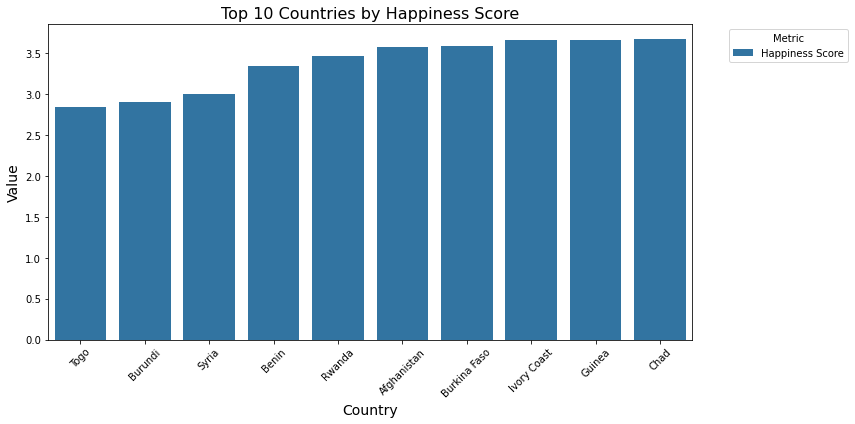

In [17]:
top_10_happy_countries = df.nsmallest(10, "Happiness Score")

df_melted = top_10_happy_countries.melt(id_vars=["Country"], value_vars=["Happiness Score"], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Country", y="Value", hue="Metric")
plt.title("Top 10 Countries by Happiness Score", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


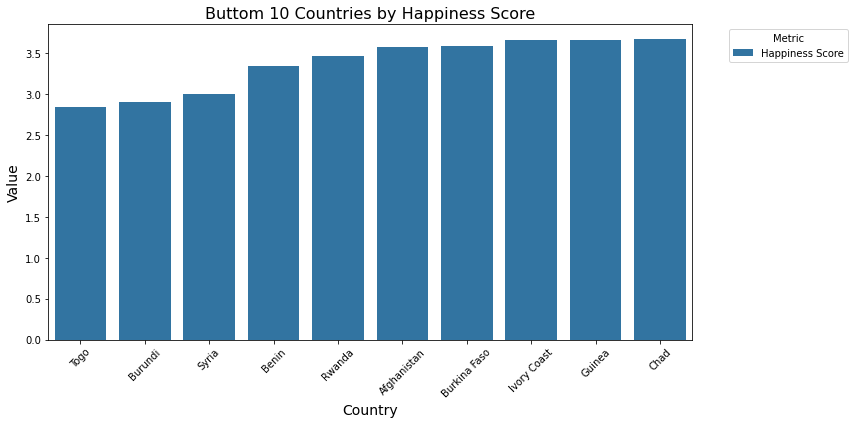

In [18]:
buttom_10_happy_countries = df.nlargest(10, "Happiness Score")

df_melted = top_10_happy_countries.melt(id_vars=["Country"], value_vars=["Happiness Score"], var_name='Metric', value_name='Value')


plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Country", y="Value", hue="Metric")
plt.title("Buttom 10 Countries by Happiness Score", fontsize=16) 
plt.xlabel("Country", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

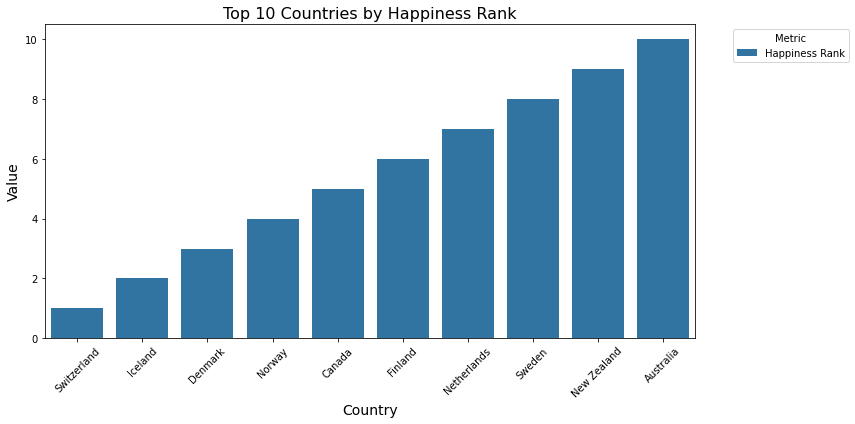

In [19]:
top_10_happy_countries = df.nsmallest(10, "Happiness Rank")

df_melted = top_10_happy_countries.melt(id_vars=["Country"], value_vars=["Happiness Rank"], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Country", y="Value", hue="Metric")
plt.title("Top 10 Countries by Happiness Rank", fontsize=16) 
plt.xlabel("Country", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


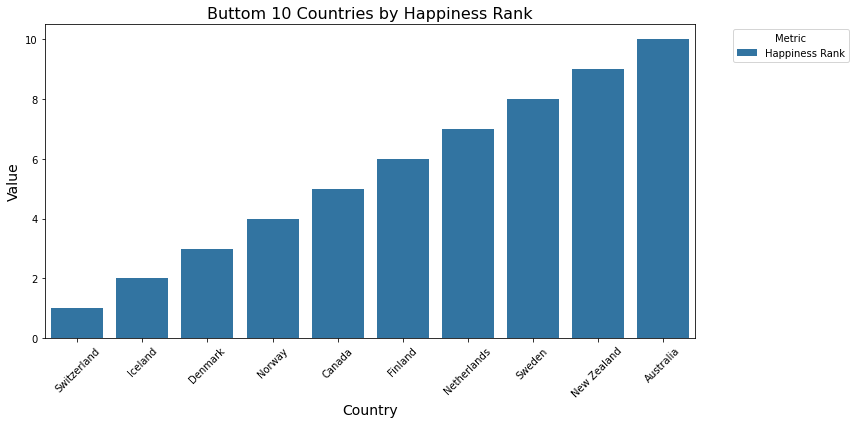

In [20]:
button_10_happy_countries = df.nlargest(10, "Happiness Rank")

df_melted = top_10_happy_countries.melt(id_vars=["Country"], value_vars=["Happiness Rank"], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Country", y="Value", hue="Metric")
plt.title("Buttom 10 Countries by Happiness Rank", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

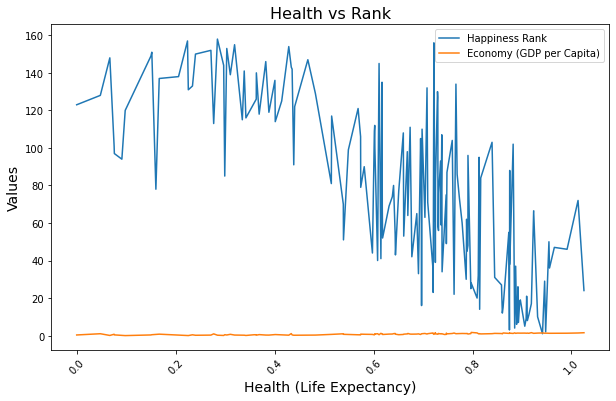

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Health (Life Expectancy)", y="Happiness Rank", label="Happiness Rank")
sns.lineplot(data=df, x="Health (Life Expectancy)", y="Economy (GDP per Capita)", label="Economy (GDP per Capita)")
plt.xlabel("Health (Life Expectancy)", fontsize=14)
plt.ylabel("Values", fontsize=14)  
plt.title("Health vs Rank", fontsize=16)
plt.xticks(rotation=45)
plt.legend() 
plt.show()


The figure shows clearly the relation between happiness and life Expectancy(Health), The happiest people have the highest life expectance and the graph shows that they also have a higher GDP per capita  

## Checking for outliers

Happiness Rank                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Standard Error                   AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Family                           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Health (Life Expectancy)         AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Freedom                          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Trust (Government Corruption)    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Generosity                             AxesSubplot(0.125,0.125;0.0945122x0.343182)
Dystopia Residual                   AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Happiness Score                     AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

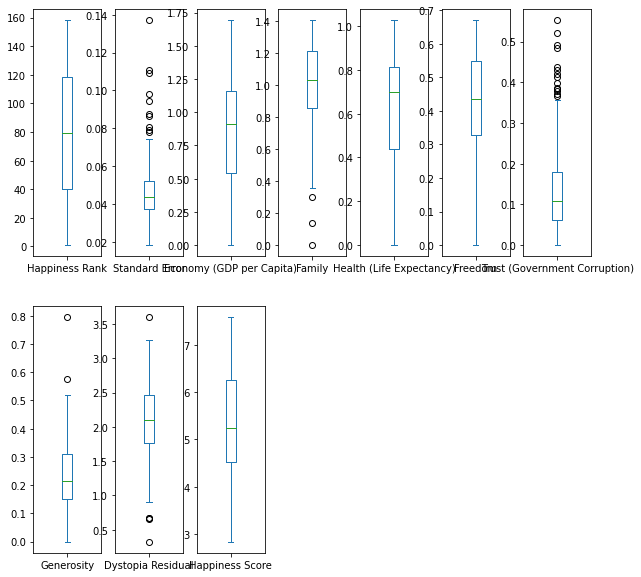

In [37]:
df.plot(kind ="box", subplots=True, layout=(2,7), figsize=(10,10))

 ## Removing Outliers

In [38]:
df.iloc[:, 3:11]

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [39]:
from scipy.stats import zscore
features = df.iloc[:, 3:11]
z = np.abs(zscore(features))
# threshold = 3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 0, 0, 0, 6, 2, 5, 7, 2], dtype=int64))

In [40]:
df1 = df[(z<3).all(axis=1)]
b = df1.shape
a = df.shape
print(df1.shape)
print( df.shape)

(149, 12)
(158, 12)


## Checking for Skewness 

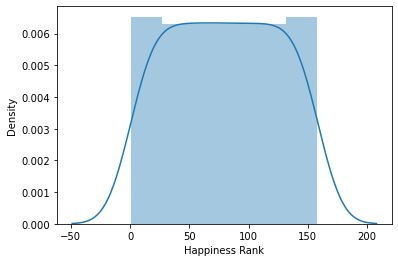

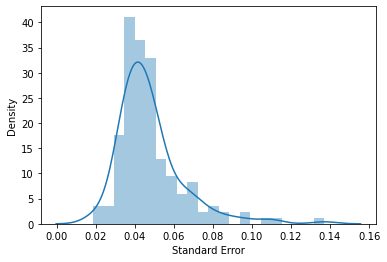

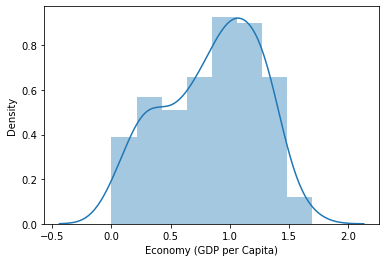

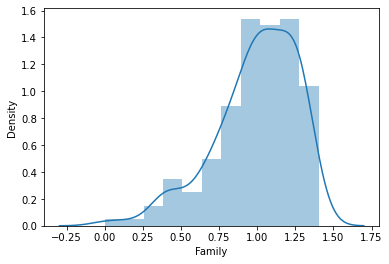

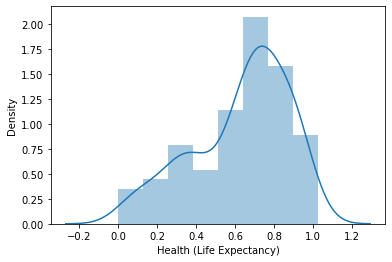

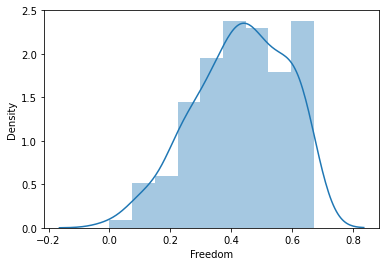

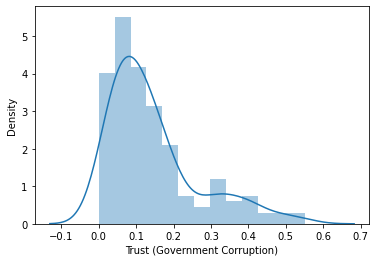

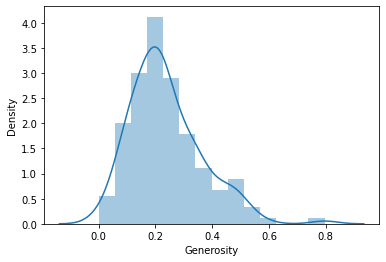

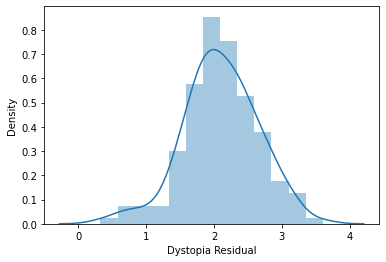

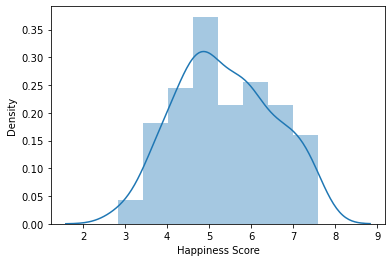

In [41]:
for i in df.columns:
    if df[i].dtype != object:
        ax = sns.distplot(df[i])
        plt.show() 

## Skewness Removal

In [ ]:
df.skew()

In [67]:
df1["Standard Error"].apply(np.cbrt)
df1["Economy (GDP per Capita)"].apply(np.cbrt)
df1["Family"].apply(np.cbrt)
df1["Health (Life Expectancy)"].apply(np.cbrt)
df1["Freedom"].apply(np.cbrt)
df1["Trust (Government Corruption)"].apply(np.cbrt)



0      0.748756
1      0.521036
2      0.784910
3      0.714677
4      0.690742
         ...   
150    0.563805
151    0.504388
152    0.459770
154    0.431066
156    0.465116
Name: Trust (Government Corruption), Length: 149, dtype: float64

In [42]:
df1.skew()

Happiness Rank                   0.003268
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
Happiness Score                  0.169740
dtype: float64

In [43]:
df1 = df[(z<3).all(axis=1)]
b = df1.shape
a = df.shape
print(df1.shape)
print( df.shape)

(149, 12)
(158, 12)


In [44]:
print("Data Loss Percentage", (((a[0]-b[0])/a[0])*100))

Data Loss Percentage 5.69620253164557


data loss is less that 10% (as general rule of thumb) therefore it's acceptable the method used. other we would use another method to calculate the data loss

## ENCODING CATEGORICAL DATA

In [45]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df1.columns:
    if df1[i].dtypes == "object":
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))

df1.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,129.0,9.0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,57.0,9.0,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,36.0,9.0,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,101.0,9.0,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24.0,5.0,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        149 non-null    float64
 1   Region                         149 non-null    float64
 2   Happiness Rank                 149 non-null    int64  
 3   Standard Error                 149 non-null    float64
 4   Economy (GDP per Capita)       149 non-null    float64
 5   Family                         149 non-null    float64
 6   Health (Life Expectancy)       149 non-null    float64
 7   Freedom                        149 non-null    float64
 8   Trust (Government Corruption)  149 non-null    float64
 9   Generosity                     149 non-null    float64
 10  Dystopia Residual              149 non-null    float64
 11  Happiness Score                149 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 15.1 KB


In [74]:
df1.corr()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Country,1.000000,0.009603,-0.125591,0.006115,0.039897,0.202092,0.037660,0.091689,0.060620,0.099905,0.048377,0.120329
Region,0.009603,1.000000,0.184520,-0.013860,-0.224928,-0.127749,-0.334531,0.101335,0.167550,0.305791,-0.059494,-0.145850
Happiness Rank,-0.125591,0.184520,1.000000,0.212085,-0.773651,-0.720359,-0.736758,-0.571089,-0.445743,-0.225626,-0.526680,-0.992921
Standard Error,0.006115,-0.013860,0.212085,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722,-0.230252
Economy (GDP per Capita),0.039897,-0.224928,-0.773651,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936,0.773577
Family,0.202092,-0.127749,-0.720359,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062,0.720868
Health (Life Expectancy),0.037660,-0.334531,-0.736758,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212,0.729191
Freedom,0.091689,0.101335,-0.571089,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596,0.585066
Trust (Government Corruption),0.060620,0.167550,-0.445743,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080,0.477692
Generosity,0.099905,0.305791,-0.225626,-0.131970,0.020730,0.154011,0.129328,0.428718,0.296450,1.000000,-0.034239,0.250903


I have converted the strings into numbers by using LabelEncoder()

<AxesSubplot:>

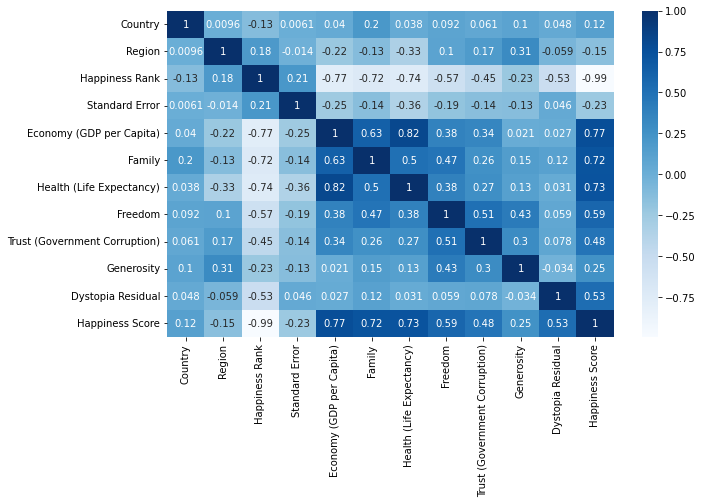

In [47]:
plt.figure(figsize = (10,6))
sns.heatmap(df1.corr(), cmap="Blues",annot=True)

we have also suspect multicollinearity problem.

In [53]:
df1.rename(columns= {"Happiness Score":"Happines_Score"}, inplace = True)
df1.corr().Happines_Score.sort_values()

Happiness Rank                  -0.992921
Standard Error                  -0.230252
Region                          -0.145850
Country                          0.120329
Generosity                       0.250903
Trust (Government Corruption)    0.477692
Dystopia Residual                0.528334
Freedom                          0.585066
Family                           0.720868
Health (Life Expectancy)         0.729191
Economy (GDP per Capita)         0.773577
Happines_Score                   1.000000
Name: Happines_Score, dtype: float64

The correlation values in ascending order with respect to the "charges" column in df1, and the value indicate how important the contribution.

The Happiness Rank has a strong negative correlation (-0.992921) with "Happines_Score," which means as the happiness rank increases (decreases in happiness), the happiness score decreases (and vice versa).
Standard Error and Region also have a negative correlation the rest of the data contribute positively. 

I wil remove the Happiness Rank for redundancy since it carries no meaninful predictive poper for the problem.

In [54]:
del df1["Happiness Rank"]
df1.head()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happines_Score
0,129.0,9.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,57.0,9.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,36.0,9.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,101.0,9.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24.0,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


The problem is a regression problem.

## Splitting the data in indipendent values and dependent value

In [58]:
x = df1.iloc[:, 0:10]
y = df1.iloc[:, 10:11]

# dimension of the features and target
print("x.shape: ", x.shape)
print("y.shape: ", y.shape)

x.shape:  (149, 10)
y.shape:  (149, 1)


## Normalization of the features - Standard Scalarization

In [59]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.278724,1.296837,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,-0.395242,1.296837,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.883482,1.296837,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,0.627737,1.296837,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-1.162476,-0.026647,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...
144,-0.209246,0.965966,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-1.255474,0.965966,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.720465,0.635095,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-1.418221,0.965966,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


## Checking for Variance Inflation Factor (VIF)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.062453,Country
1,1.420885,Region
2,1.188082,Standard Error
3,4.300757,Economy (GDP per Capita)
4,2.028894,Family
5,3.982369,Health (Life Expectancy)
6,1.870357,Freedom
7,1.498807,Trust (Government Corruption)
8,1.478136,Generosity
9,1.036887,Dystopia Residual


Normally VIF > 1 indicates some level of multicollinearity. Multicollinearity increases with the VIF. Common threshold values for identifying multicollinearity VIF > 10 and therefore I will leave it to look at the outcome of the model 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [63]:
# finding the best Random State

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ", maxAccu, "on Random_state", maxRS)

Maximum r2 score is  0.9999999598334305 on Random_state 117


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=maxRS)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=maxRS)

lr = LinearRegression()
gbr = GradientBoostingRegressor()
adr = AdaBoostRegressor()
ls = Lasso()
rg = Ridge()
dtr = DecisionTreeRegressor()
svR = SVR()
etr = ExtraTreesRegressor()
rfr = RandomForestRegressor()


models = [lr, gbr, adr,ls,rg,dtr,svR,etr,rfr]
for model in models:
    model.fit(x_train, y_train)
    pred_model = model.predict(x_test)
    pred_train = model.predict(x_train)
    print(model)
    print("R2_score: ",  r2_score(y_test, pred_model)*100)
    print("R2_ score on training Data: ", r2_score(y_train, pred_train)*100)
    print("Mean Absolute Error: ", mean_absolute_error(y_test,pred_model))
    print("Mean Squared Error: ", mean_squared_error(y_test, pred_model))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_model)))
    print('\n')
    

LinearRegression()
R2_score:  99.99999598334306
R2_ score on training Data:  99.99999306253015
Mean Absolute Error:  0.00022179575709263172
Mean Squared Error:  6.701961561930666e-08
Root Mean Squared Error:  0.0002588814702123477


GradientBoostingRegressor()
R2_score:  97.45876262756612
R2_ score on training Data:  99.91604057530154
Mean Absolute Error:  0.16499725739245683
Mean Squared Error:  0.042401617509454856
Root Mean Squared Error:  0.20591653044244615


AdaBoostRegressor()
R2_score:  94.36324562517794
R2_ score on training Data:  95.74840856423576
Mean Absolute Error:  0.2562913390696423
Mean Squared Error:  0.0940516244521627
Root Mean Squared Error:  0.30667837297755884


Lasso()
R2_score:  -1.9612876254067269
R2_ score on training Data:  0.0
Mean Absolute Error:  1.192871148459384
Mean Squared Error:  1.7012670935668384
Root Mean Squared Error:  1.3043262987331192


Ridge()
R2_score:  99.99634194364026
R2_ score on training Data:  99.99671749743585
Mean Absolute Error:  0

In [66]:
from sklearn.model_selection import cross_val_score

for model in models:
    score = cross_val_score(model,x,y,cv=5, scoring='r2')
    print(model)
    print(score)
    print(score.mean())
    print("Difference between R2 and cross validation score is: ", (r2_score(y_test, pred_model)-score.mean())*100)
    print('\n')

LinearRegression()
[0.99999949 0.99999859 0.99999831 0.9999953  0.9999992 ]
0.999998176753012
Difference between R2 and cross validation score is:  -4.676869603913425


GradientBoostingRegressor()
[-4.72208883 -0.098892   -1.11949914 -2.52126163 -4.41709219]
-2.5757667562490623
Difference between R2 and cross validation score is:  352.89962369629404


AdaBoostRegressor()
[-9.47348642 -6.83464844 -2.80149026 -4.06901257 -7.44195607]
-6.124118752147247
Difference between R2 and cross validation score is:  707.7348232861125


Lasso()
[-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ]
-23.099531692553747
Difference between R2 and cross validation score is:  2405.2761173267622


Ridge()
[0.99386667 0.99960413 0.99949189 0.99912551 0.99776228]
0.9979700968903271
Difference between R2 and cross validation score is:  -4.474061617644942


DecisionTreeRegressor()
[ -8.57435277  -7.65838956  -7.3938032  -10.68350008  -5.87676931]
-8.037362983555854
Difference between R2 and cross 

From the difference of both R2 score and Cross Validation score computed on R2 score we can conclude that LinearRegression()
 is the best fitting and best performance.

## Final Model

In [75]:
Model  = LinearRegression()
Model.fit(x_train, y_train)
pred = Model.predict(x_test)
print(Model)
print("R2_score: ", (round(r2_score(y_test, pred)*100)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
print("Mean Squared Error: ", mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred)))

LinearRegression()
R2_score:  100
Mean Absolute Error:  0.00022179575709263172
Mean Squared Error:  6.701961561930666e-08
Root Mean Squared Error:  0.0002588814702123477


In [70]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(Model,x,y,cv=5, scoring='r2')
print(Model)
print(score*100)
print(score.mean())
print("Difference between R2 and cross validation score is: ", (r2_score(y_test, pred_model)-score.mean())*100)
print('\n')

LinearRegression()
[99.99994861 99.99985922 99.99983066 99.99953017 99.99991972]
0.999998176753012
Difference between R2 and cross validation score is:  -4.676869603913425




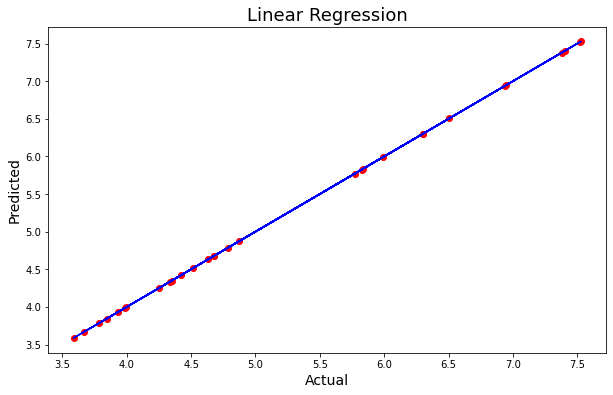

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(x=pred, y=y_test, color="r")
plt.plot(pred, pred, color = "b")
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Linear Regression", fontsize=18)
plt.show()

The Linear Regression line best represents the relationship between the independent variable(s) and the dependent variable in the data: The data points fit almost perfect our line 100%

In [76]:
import joblib
joblib.dump(Model, 'World_Happiness_Report.pkl')

['World_Happiness_Report.pkl']

In [77]:
import pickle
filename = 'World_Happiness_Report.pkl'
pickle.dump(Model,open(filename, 'wb'))  #saved the model

In [80]:
import pickle
loaded_model = pickle.load(open('World_Happiness_Report.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(round(result*100))

100


## Tessting Predictions per parameters for Switzerland

In [88]:
def testvalue(p):
    p = p.reshape(1, -1)

    pred_Happines_Score_Switzerland = Model.predict(p)

   
    return pred_Happines_Score_Switzerland

j = np.array([1.278724, 1.296837, 0.866786, 1.381916, 1.357879, 1.235390, 1.583704, 2.472255, 0.546305, 0.756876])


predictions = testvalue(j)



print(predictions)


[[7.58678358]]


perfect!